In [1]:
from mplsoccer import Pitch, VerticalPitch, arrowhead_marker
from mplsoccer.dimensions import valid, size_varies, center_scale_dims
import matplotlib.pyplot as plt
import numpy as np
import random
np.random.seed(42)
random.seed(42)

In [2]:
dim = center_scale_dims(pitch_width=68, pitch_length=105,
                        width=5, length=100, invert_y=False)
valid.extend([dim])

# Check if limited number of arrows that the arrows face in the same direction

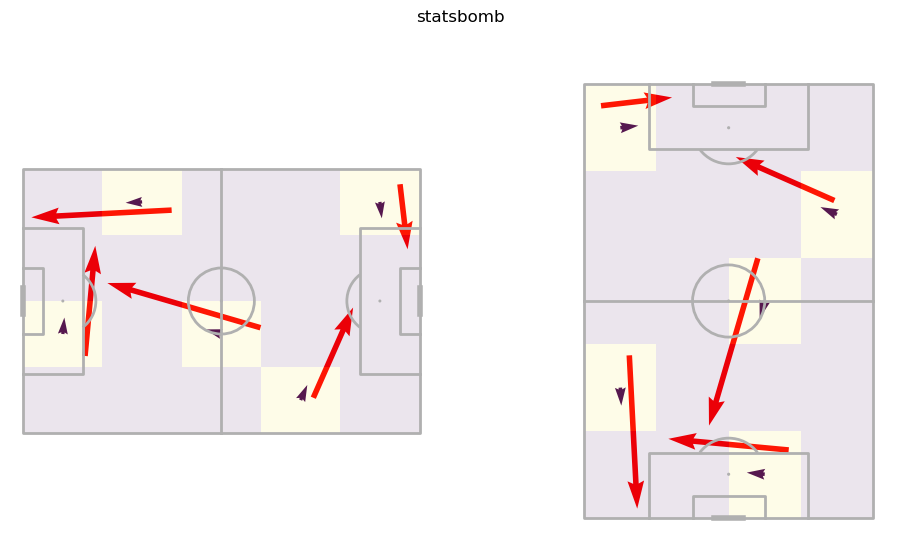

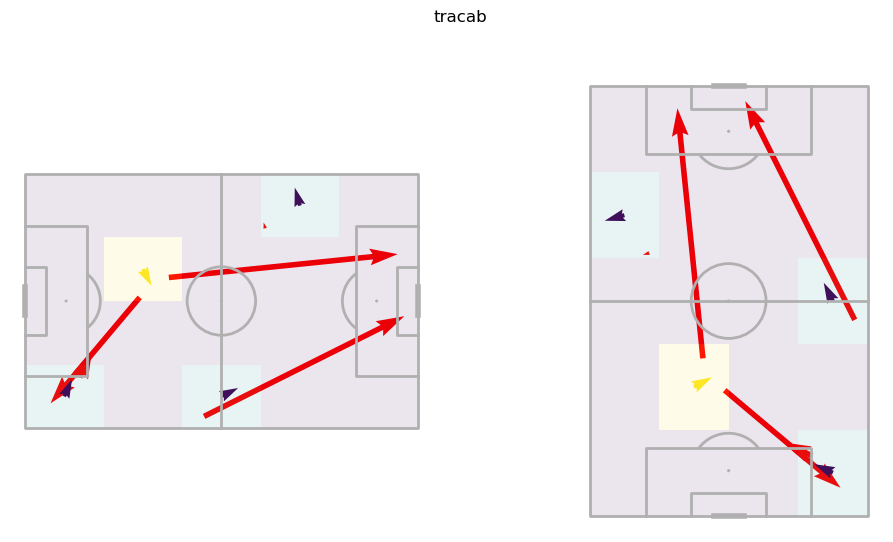

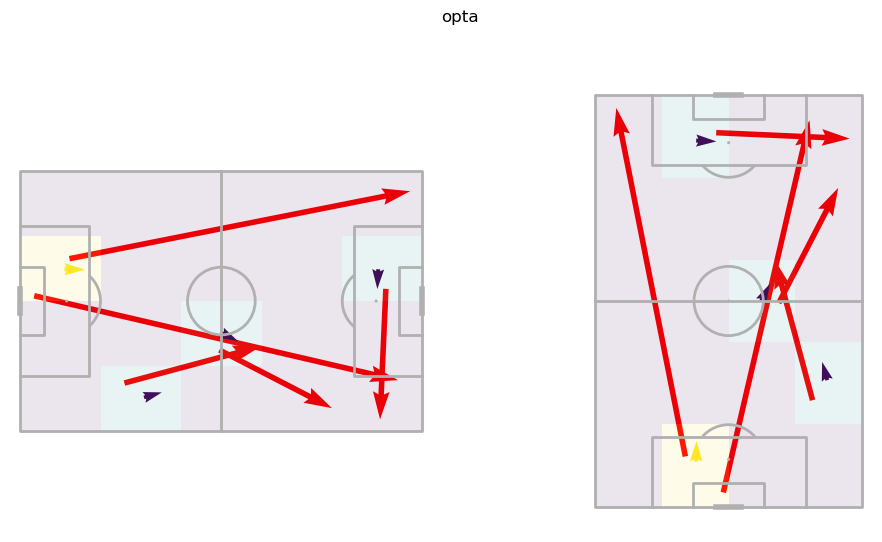

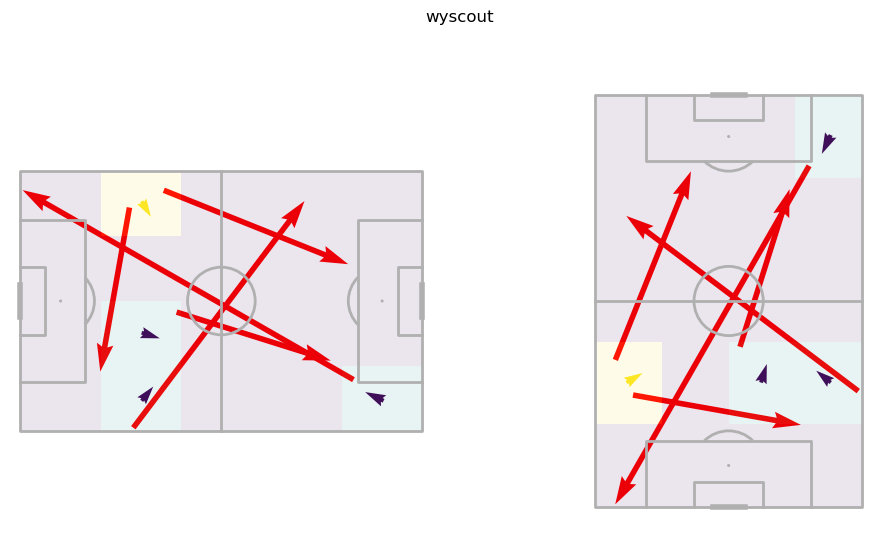

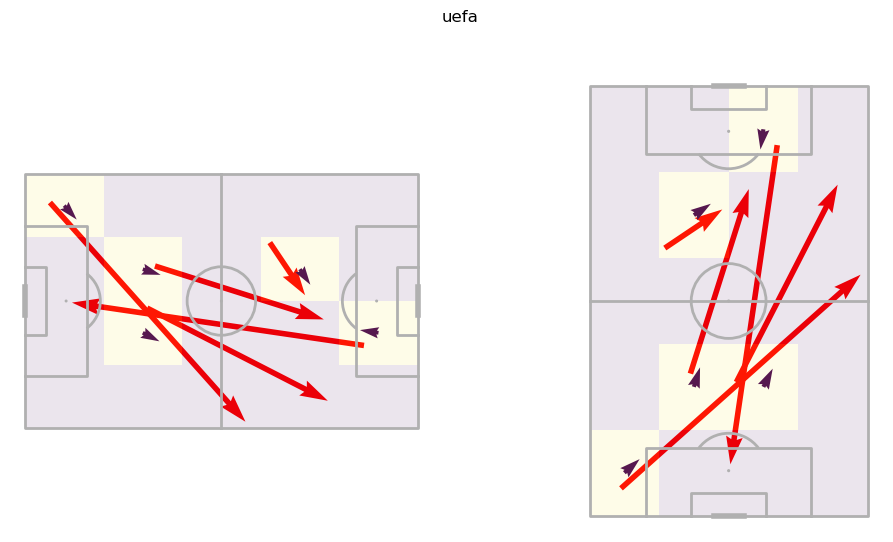

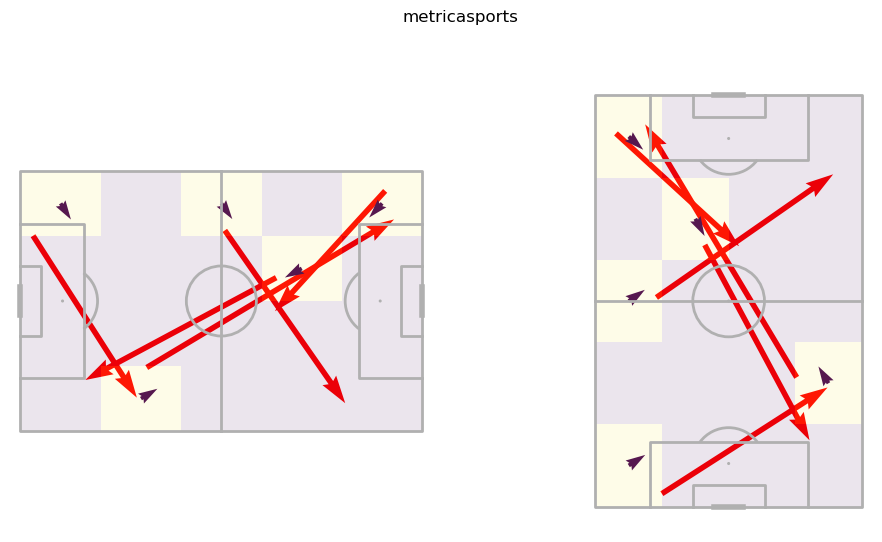

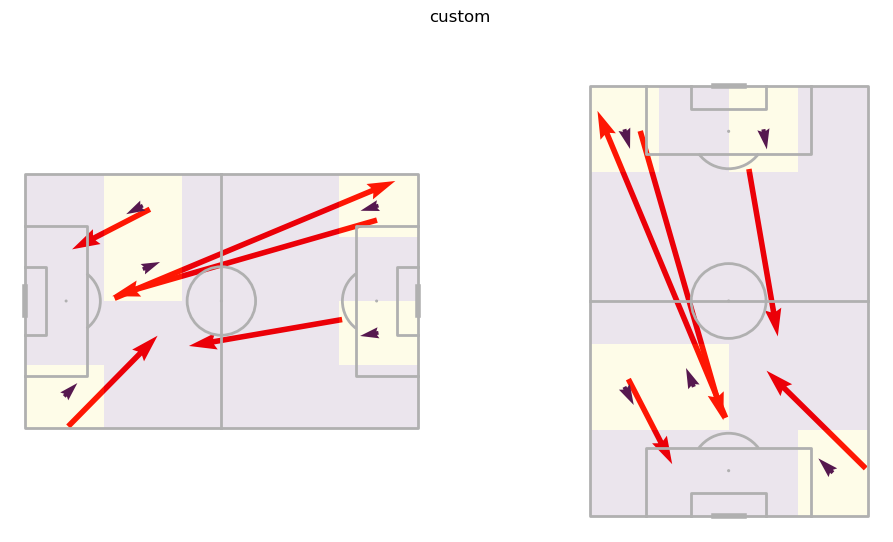

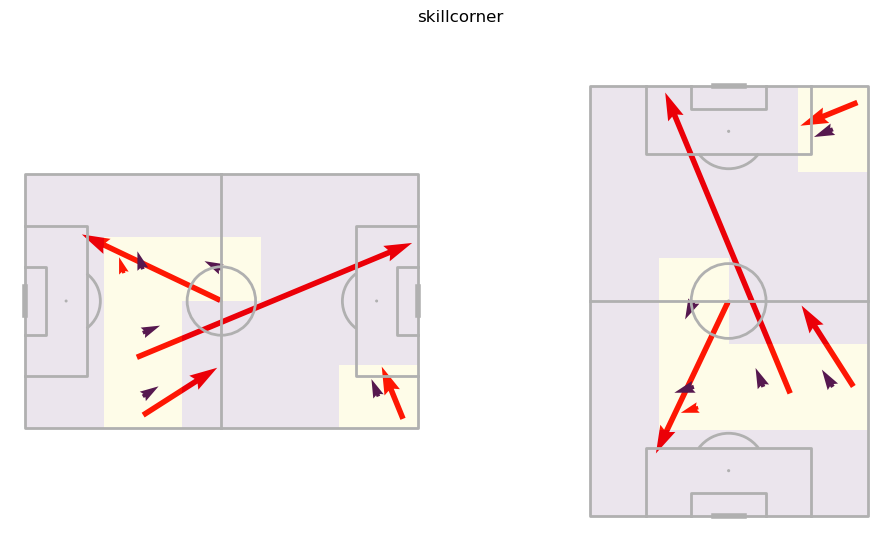

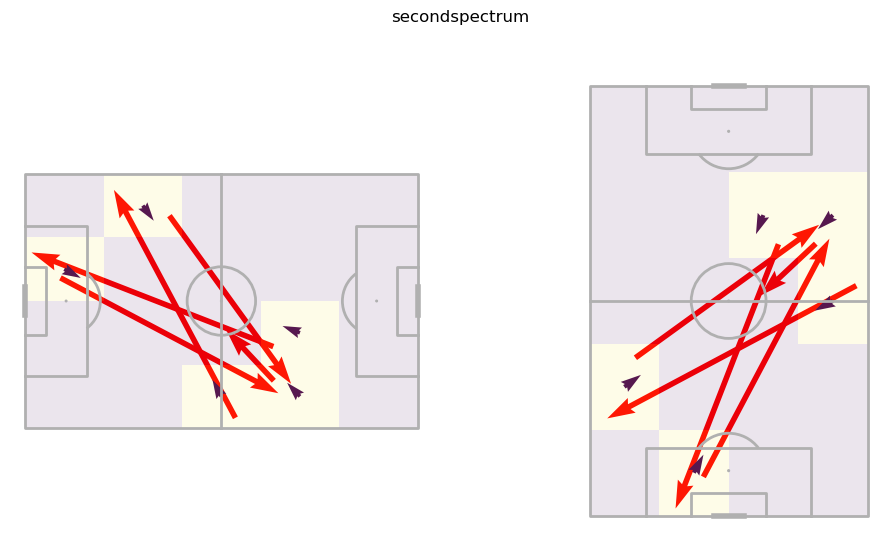

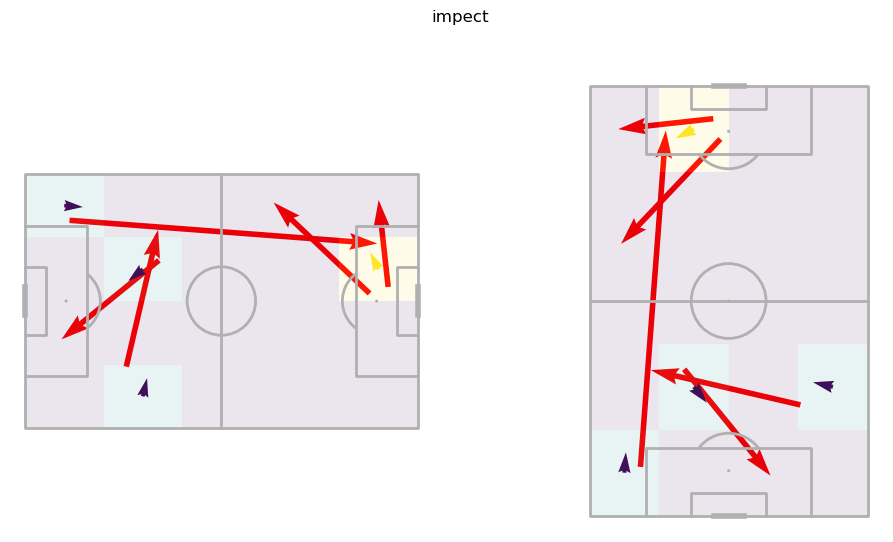

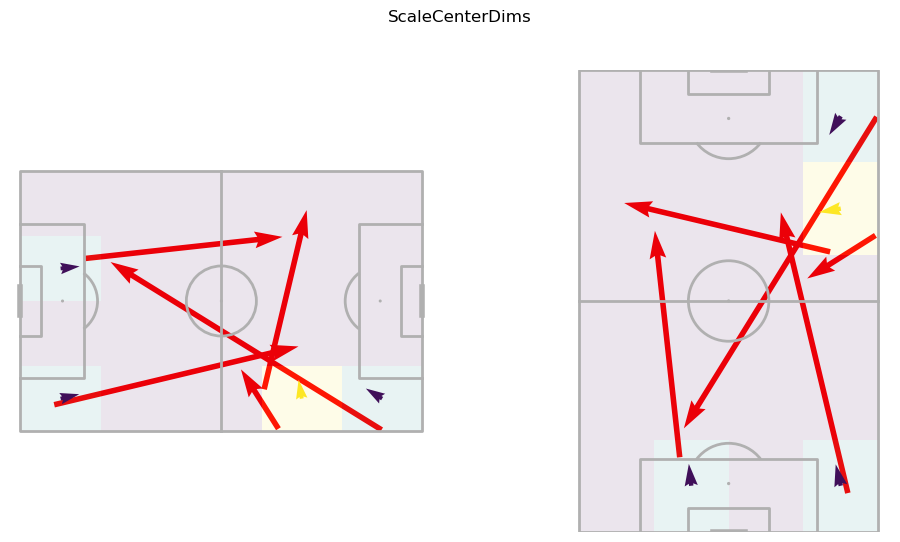

In [3]:
for pitch_type in valid:
    if pitch_type in size_varies:
        kwargs = {'pitch_length': 105, 'pitch_width': 68}
    else:
        kwargs = {}
    pitch = Pitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    pitch_vertical = VerticalPitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    if type(pitch_type) == str:
        fig.suptitle(pitch_type)
    else:
        fig.suptitle(type(pitch_type).__name__)
        
    pitch.draw(ax[0])
    pitch_vertical.draw(ax[1])
    
    x = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=5)
    y = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=5)
    x_end = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=5)
    y_end = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=5)
    
    pitch.arrows(x, y, x_end, y_end, ax=ax[0], color='red')
    pitch.flow(x, y, x_end, y_end, ax=ax[0])
    stats = pitch.bin_statistic(x, y)
    hm = pitch.heatmap(stats, ax=ax[0], alpha=0.1)
    
    pitch_vertical.arrows(x, y, x_end, y_end, ax=ax[1], color='red')
    pitch_vertical.flow(x, y, x_end, y_end, ax=ax[1])
    stats_vertical = pitch_vertical.bin_statistic(x, y)
    hm = pitch_vertical.heatmap(stats, ax=ax[1], alpha=0.1)

# Check the distance is the same as the angle

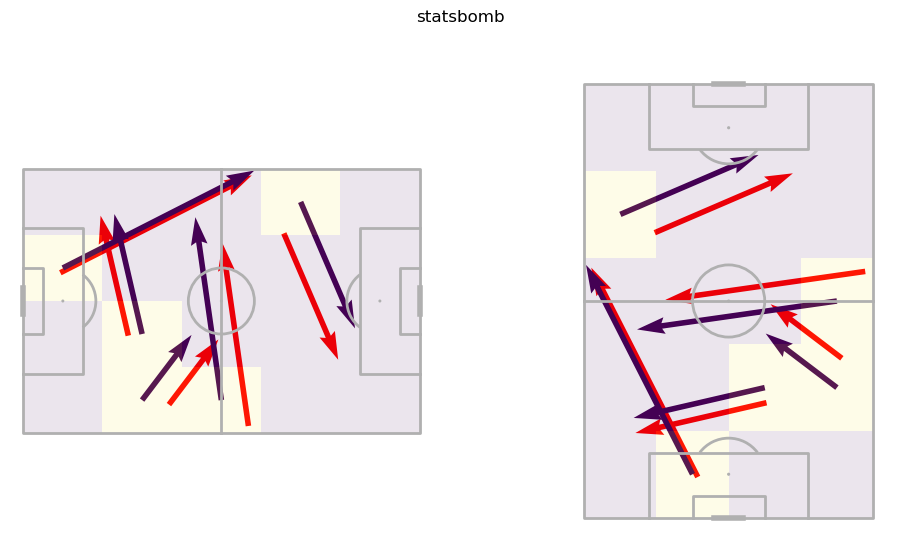

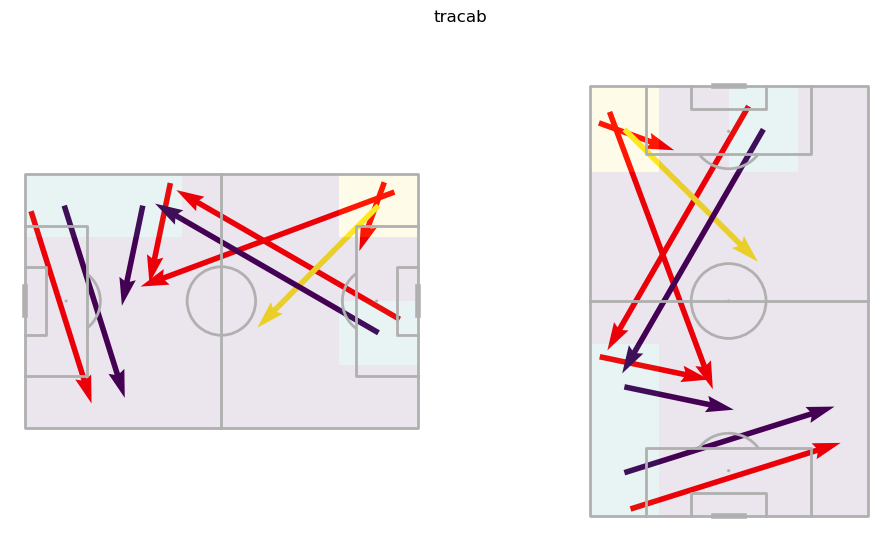

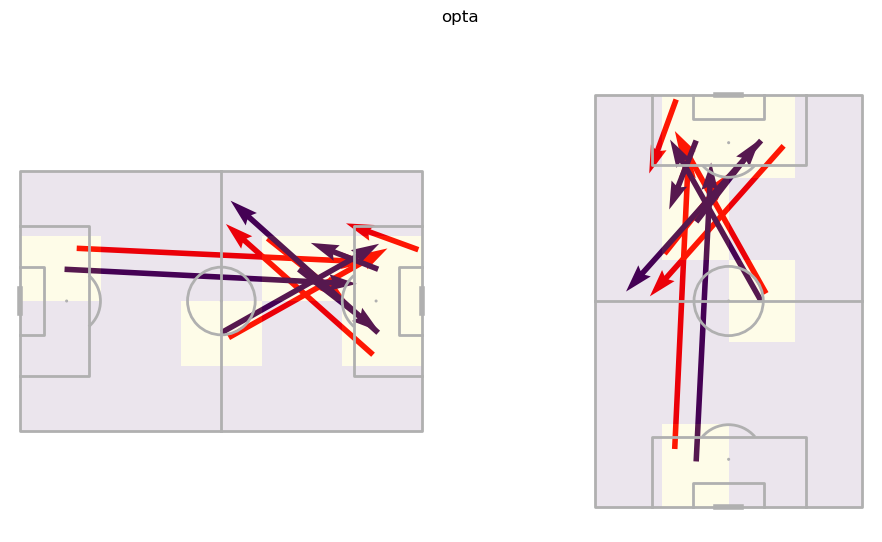

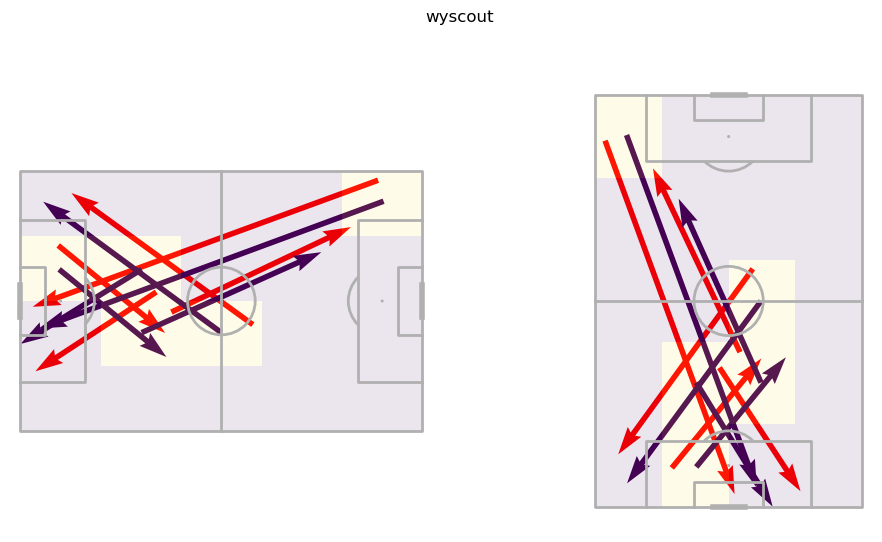

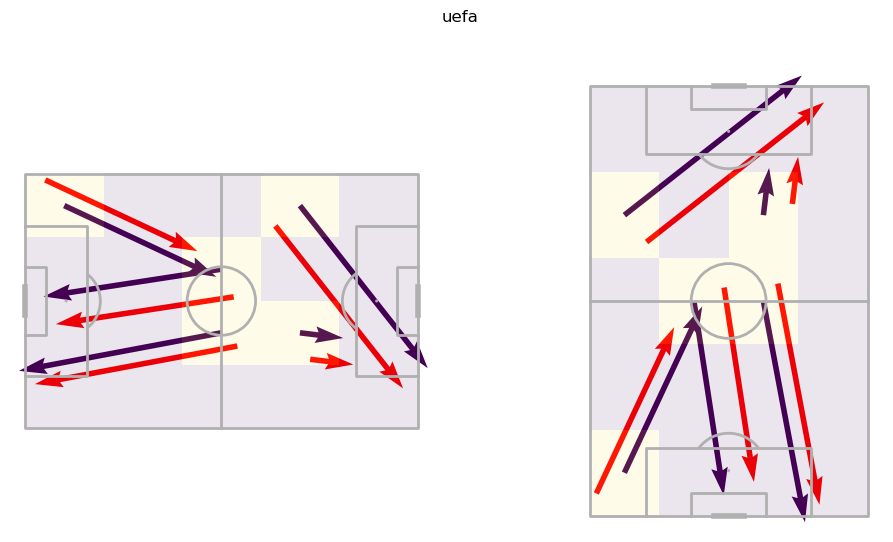

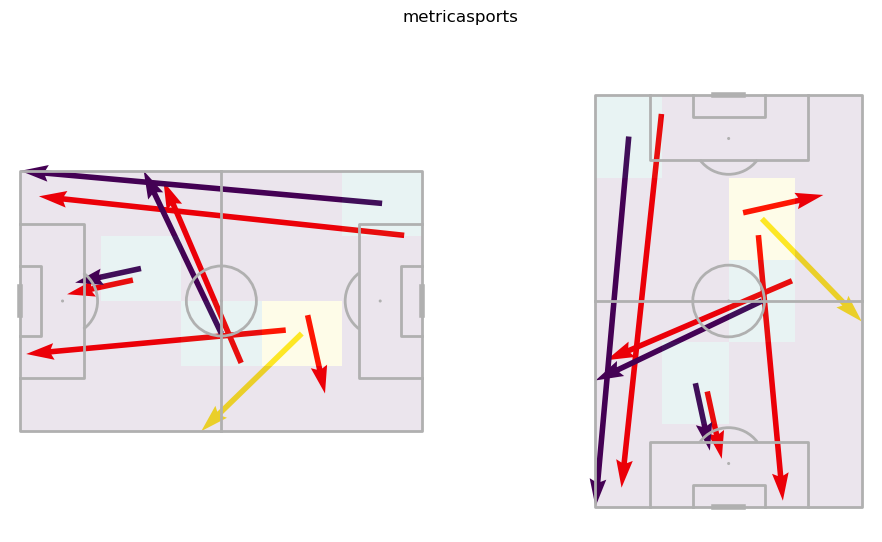

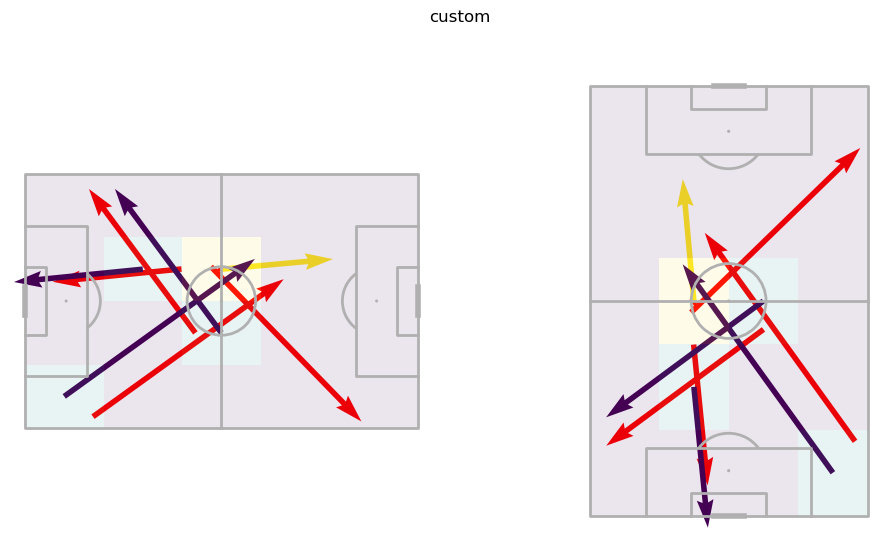

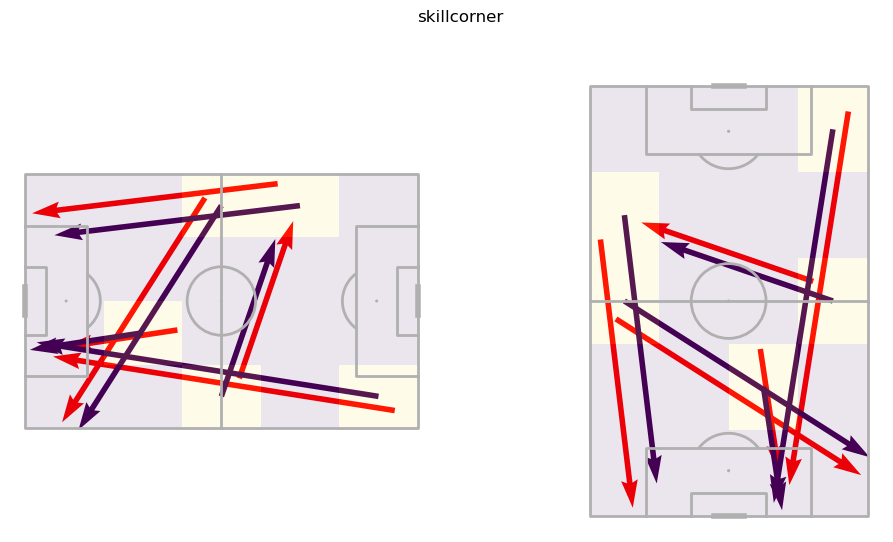

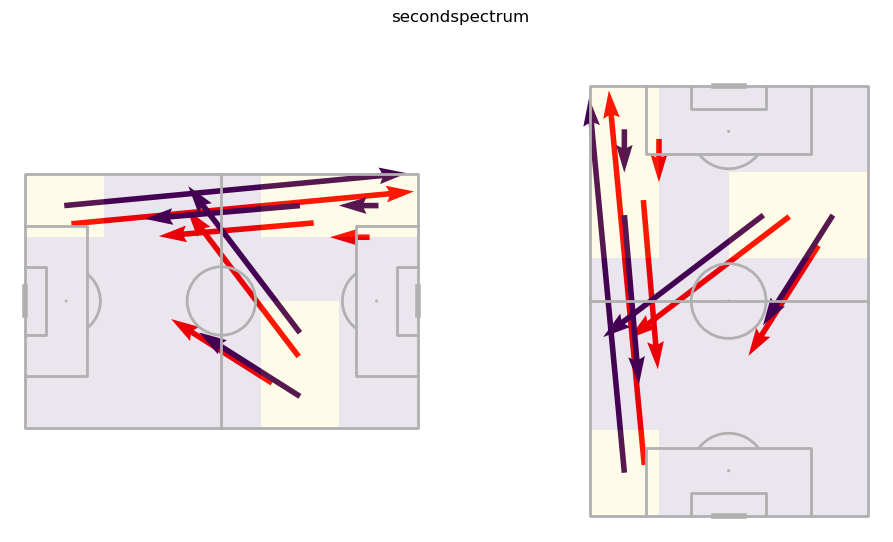

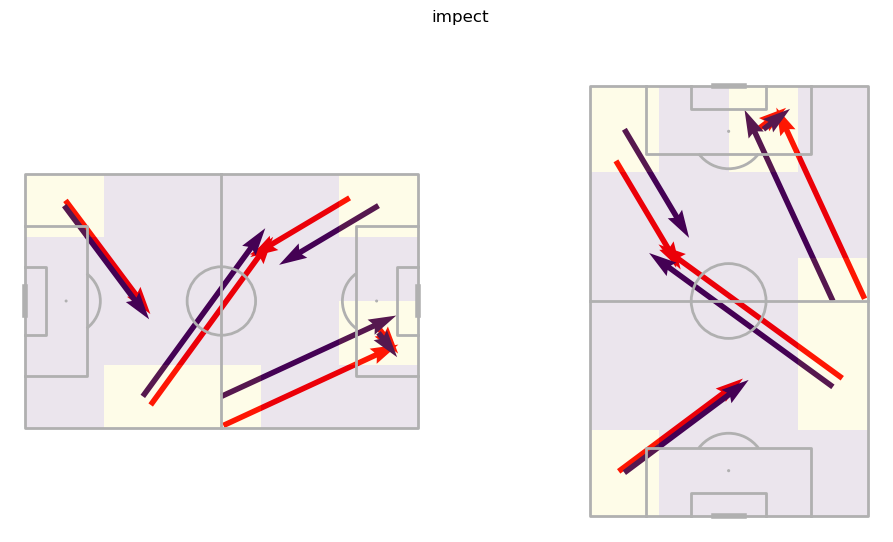

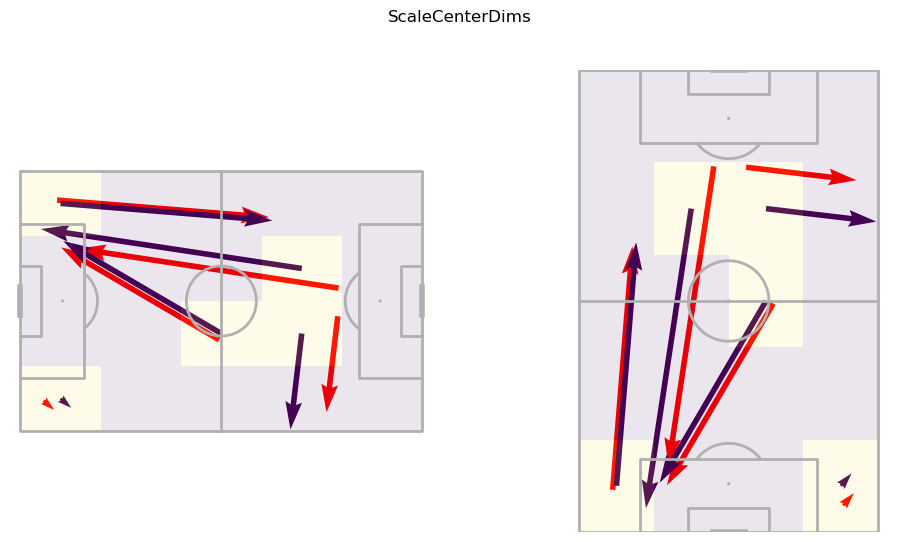

In [4]:
for pitch_type in valid:
    if pitch_type in size_varies:
        kwargs = {'pitch_length': 105, 'pitch_width': 68}
    else:
        kwargs = {}
    pitch = Pitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    pitch_vertical = VerticalPitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    if type(pitch_type) == str:
        fig.suptitle(pitch_type)
    else:
        fig.suptitle(type(pitch_type).__name__)
        
    pitch.draw(ax[0])
    pitch_vertical.draw(ax[1])
    
    x = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=5)
    y = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=5)
    x_end = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=5)
    y_end = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=5)
    
    pitch.arrows(x, y, x_end, y_end, ax=ax[0], color='red')
    pitch.flow(x, y, x_end, y_end, arrow_type='average', ax=ax[0])
    stats = pitch.bin_statistic(x, y)
    hm = pitch.heatmap(stats, ax=ax[0], alpha=0.1)
    
    pitch_vertical.arrows(x, y, x_end, y_end, ax=ax[1], color='red')
    pitch_vertical.flow(x, y, x_end, y_end, arrow_type='average', ax=ax[1])
    stats_vertical = pitch_vertical.bin_statistic(x, y)
    hm = pitch_vertical.heatmap(stats, ax=ax[1], alpha=0.1)

# Check the angle points in the same direction as the arrow

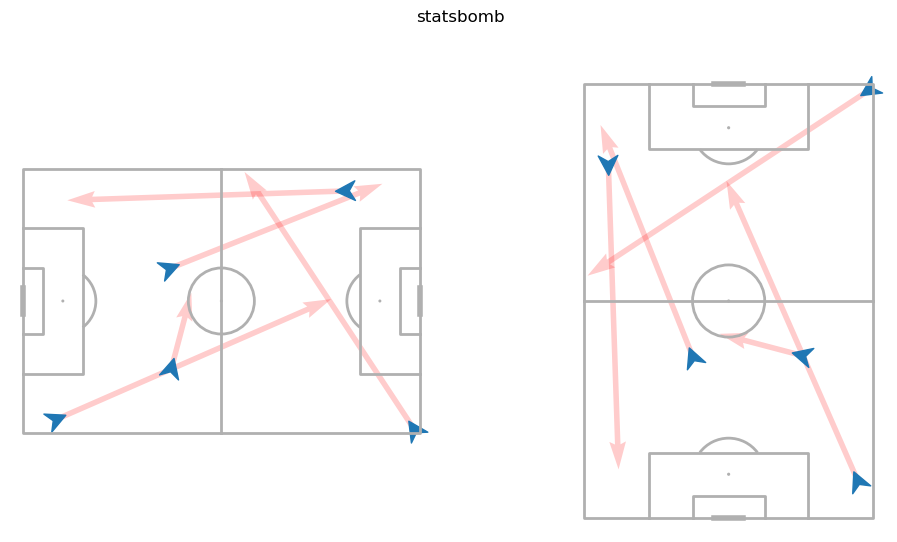

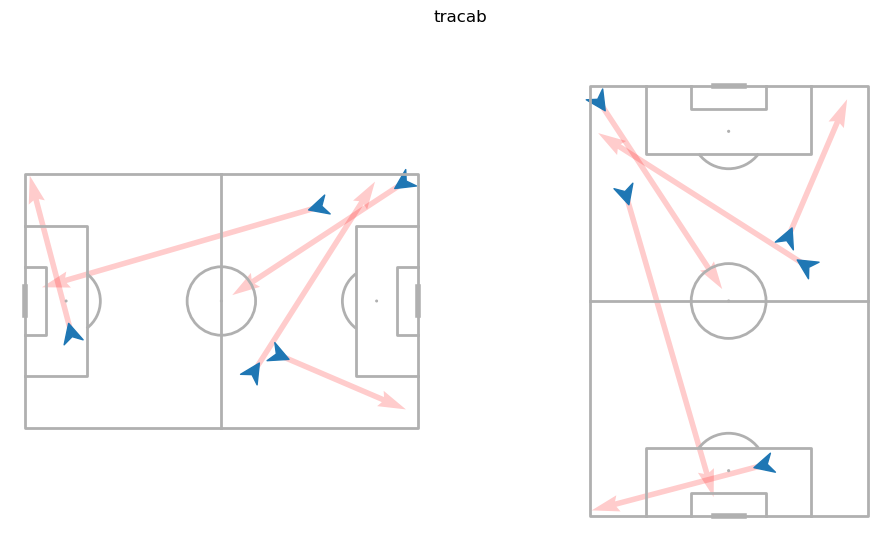

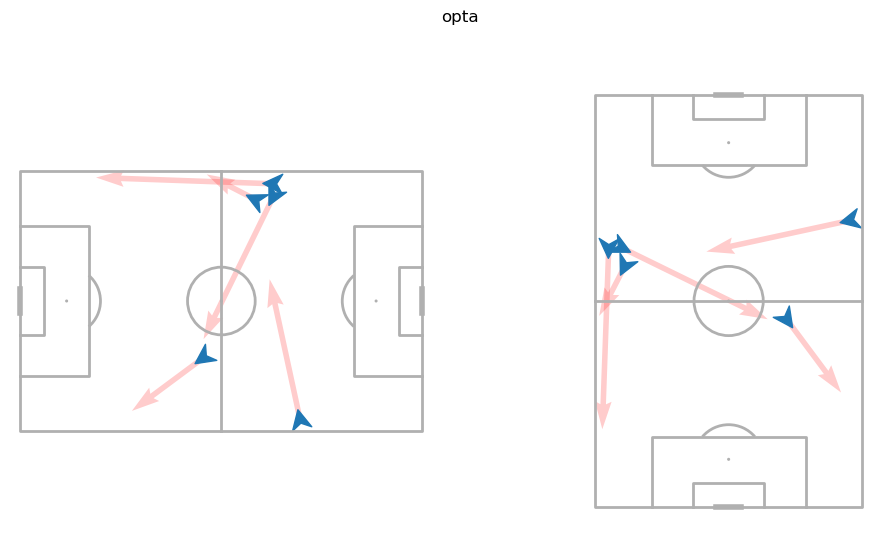

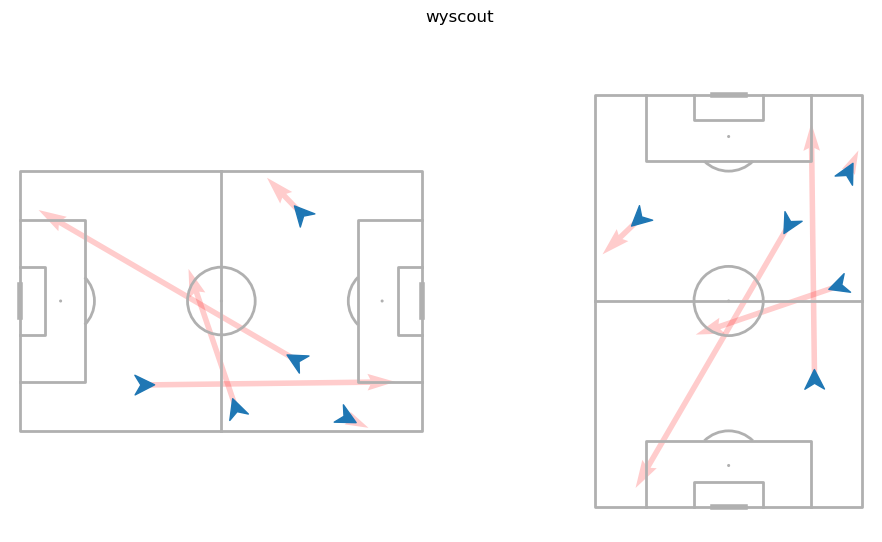

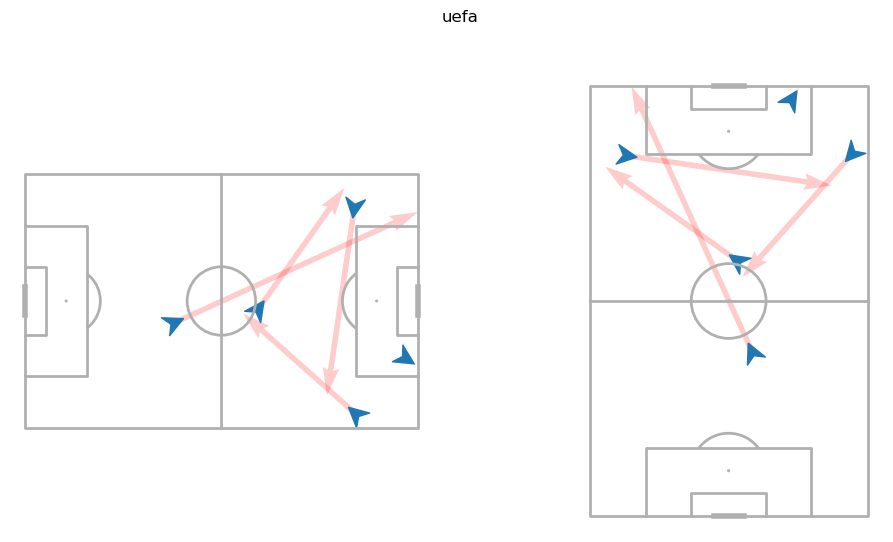

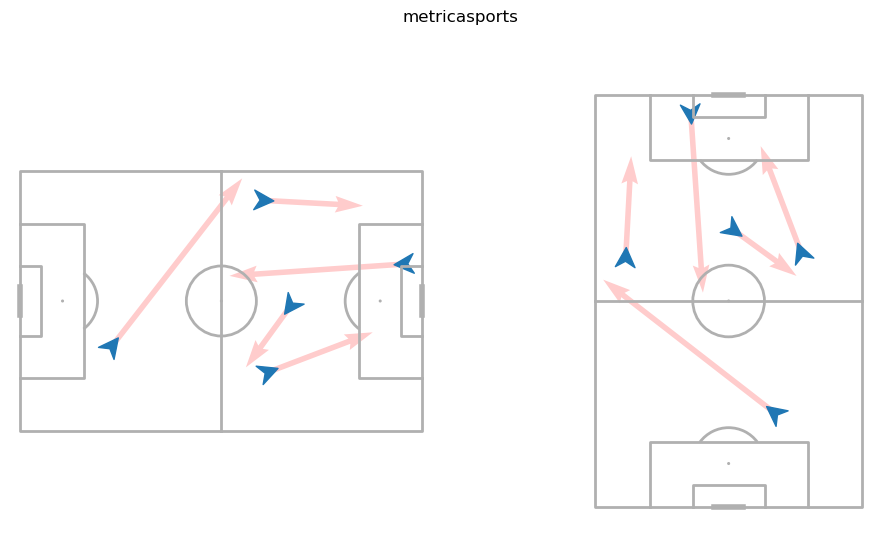

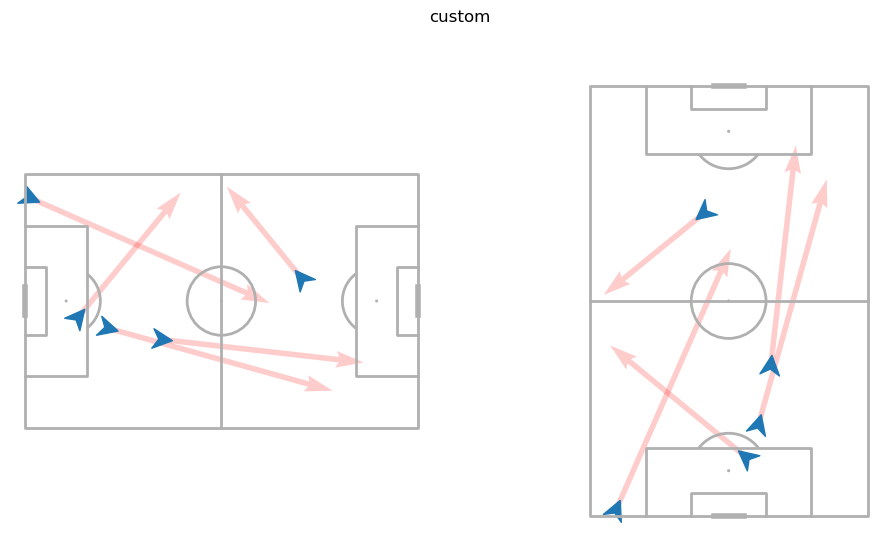

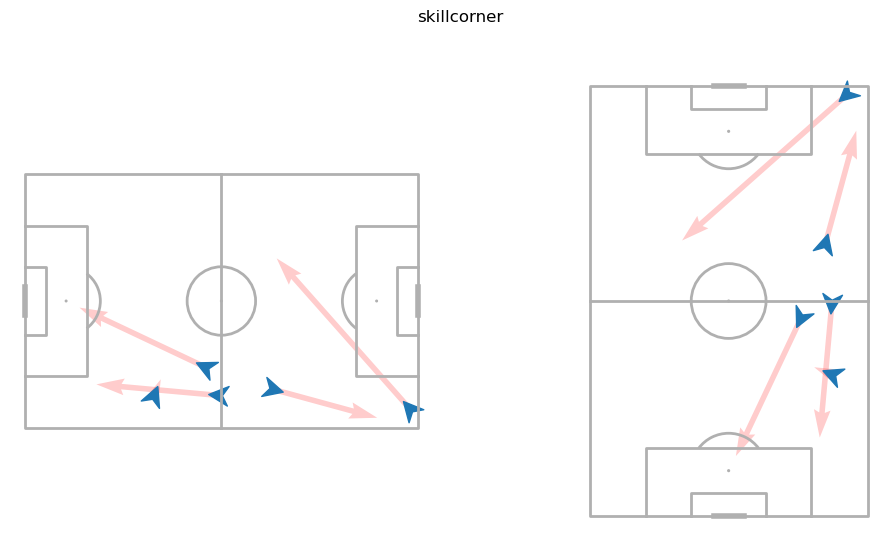

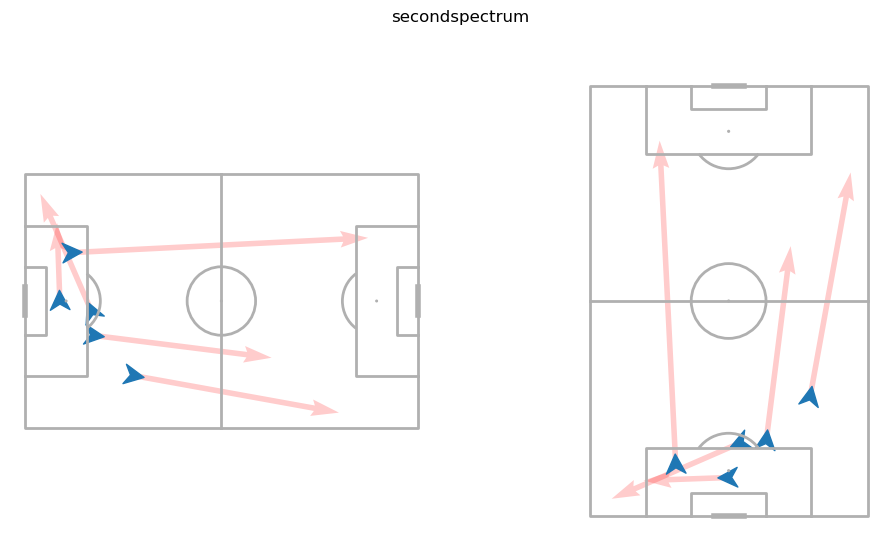

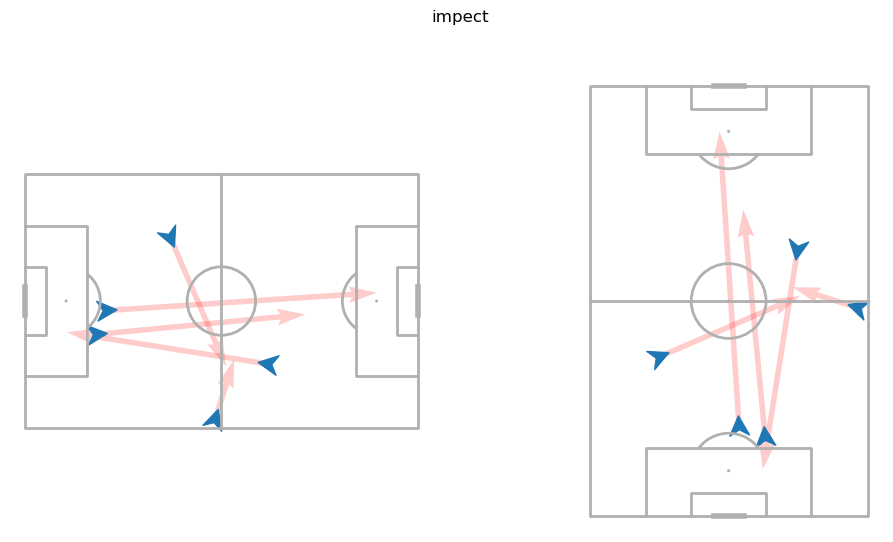

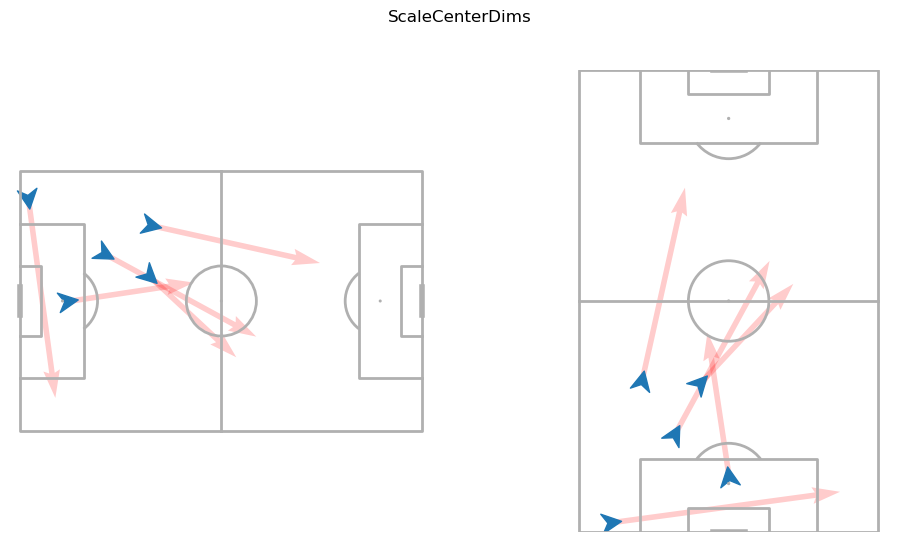

In [5]:
for pitch_type in valid:
    if pitch_type in size_varies:
        kwargs = {'pitch_length': 105, 'pitch_width': 68}
    else:
        kwargs = {}
    pitch = Pitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    pitch_vertical = VerticalPitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    if type(pitch_type) == str:
        fig.suptitle(pitch_type)
    else:
        fig.suptitle(type(pitch_type).__name__)
    
    pitch.draw(ax[0])
    pitch_vertical.draw(ax[1])
    
    x = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=5)
    y = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=5)
    x_end = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=5)
    y_end = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=5)

    pitch.arrows(x, y, x_end, y_end, ax=ax[0], alpha=0.2, color='red')
    pitch_vertical.arrows(x, y, x_end, y_end, ax=ax[1], alpha=0.2, color='red')

    if not pitch.dim.aspect_equal:
        x_new, y_new = pitch.standardizer.transform(x, y)
        x_end_new, y_end_new = pitch.standardizer.transform(x_end, y_end)
        angle, distance = pitch.calculate_angle_and_distance(x_new, y_new, x_end_new,
                                                             y_end_new, degrees=True,
                                                             standardized=True)
    else:
        angle, distance = pitch.calculate_angle_and_distance(x, y, x_end, y_end, degrees=True)
    rotated_scatter = pitch.scatter(x, y, rotation_degrees=angle, s=200, marker=arrowhead_marker, ax=ax[0])


    if not pitch.dim.aspect_equal:
        x_new, y_new = pitch_vertical.standardizer.transform(x, y)
        x_end_new, y_end_new = pitch_vertical.standardizer.transform(x_end, y_end)
        angle_vertical, distance_vertical = pitch_vertical.calculate_angle_and_distance(x_new, y_new, x_end_new,
                                                             y_end_new, degrees=True,
                                                             standardized=True)
    else:
        angle_vertical, distance_vertical = pitch.calculate_angle_and_distance(x, y, x_end, y_end, degrees=True)
    rotated_scatter_vertical = pitch_vertical.scatter(x, y, rotation_degrees=angle_vertical, s=200,
                                                      marker=arrowhead_marker, ax=ax[1])